In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def get_file(file, file_type='csv'):
    if file_type == 'csv':
        dt = pd.read_csv(file)
    return dt

def label_representation(data, col):
    return pd.DataFrame(data[col].value_counts())

In [3]:
data = get_file('./datasets/accident_data.csv')
data.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,None,04/01/2005,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,None,05/01/2005,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,None,30,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,None,06/01/2005,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,None,07/01/2005,Friday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,NaN,0.0,NaN,0.0,Slight,None,10/01/2005,Monday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30,21:13,Urban,Fine no high winds,2005,No


# Data Representation

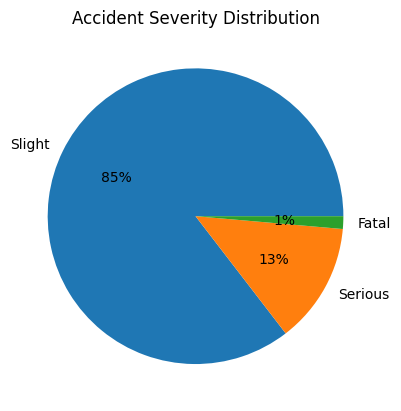

In [4]:
representation = label_representation(data, 'Accident_Severity')
plt.pie(representation['Accident_Severity'], labels=['Slight', 'Serious', 'Fatal'], autopct='%.0f%%')
plt.title('Accident Severity Distribution')
plt.show()

# Check for Missing Values

<AxesSubplot: >

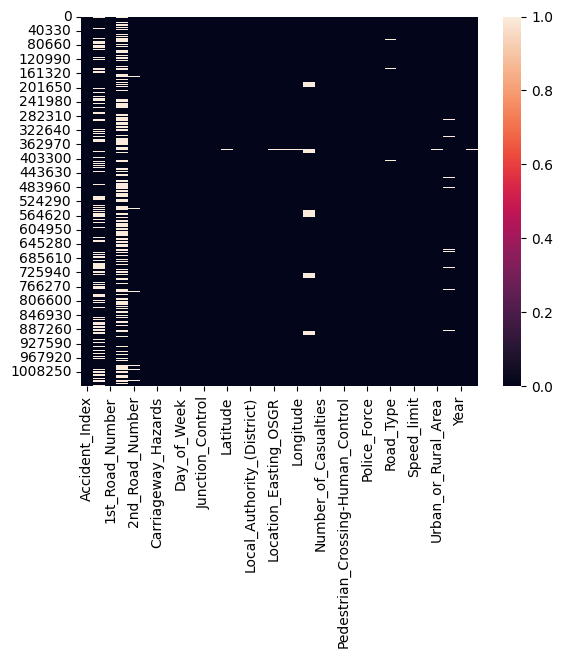

In [5]:
sns.heatmap(data.isnull())

In [13]:
unq_vals = [(var, data[var].value_counts()) for var in data.columns]
unq_vals

[('Accident_Index',
  2.00513E+12      7277
  2.00613E+12      7162
  2.00713E+12      6867
  2.00813E+12      6501
  2.00913E+12      6255
                   ... 
  200643W022056       1
  200643W022076       1
  200643W022106       1
  200643W023036       1
  201091NM02142       1
  Name: Accident_Index, Length: 671340, dtype: int64),
 ('1st_Road_Class',
  A           470854
  B           133179
  C            93983
  Motorway     42297
  A(M)          2673
  Name: 1st_Road_Class, dtype: int64),
 ('1st_Road_Number',
  0.0       286845
  1.0        13835
  6.0        11998
  4.0         9889
  25.0        7080
             ...  
  7581.0         1
  7630.0         1
  7262.0         1
  4134.0         1
  9070.0         1
  Name: 1st_Road_Number, Length: 6552, dtype: int64),
 ('2nd_Road_Class',
  Unclassified    411064
  A               102148
  C                47542
  B                40221
  Motorway          6980
  A(M)               796
  Name: 2nd_Road_Class, dtype: int64),
 ('2

In [8]:
data.isnull().sum()

Accident_Index                                      0
1st_Road_Class                                 305589
1st_Road_Number                                     2
2nd_Road_Class                                 439824
2nd_Road_Number                                 10803
Accident_Severity                                   0
Carriageway_Hazards                                29
Date                                                0
Day_of_Week                                         0
Did_Police_Officer_Attend_Scene_of_Accident       269
Junction_Control                                    0
Junction_Detail                                     0
Latitude                                          111
Light_Conditions                                 2084
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
Location_Easting_OSGR                             111
Location_Northing_OSGR                            111
Longitude                   

In [10]:
p_missing_cols = [(var, data[var].isnull().mean()) for var in data.columns]
pd.DataFrame(p_missing_cols)

,0,1
0,Accident_Index,0.000000
1,1st_Road_Class,0.291433
2,1st_Road_Number,0.000002
3,2nd_Road_Class,0.419449
4,2nd_Road_Number,0.010303
5,Accident_Severity,0.000000
6,Carriageway_Hazards,0.000028
7,Date,0.000000
8,Day_of_Week,0.000000
9,Did_Police_Officer_Attend_Scene_of_Accident,0.000257


# Missing Value Cleanup

In [33]:
cols = [var for var in data.columns if data[var].isnull().mean() < 0.05 and data[var].isnull().mean() > 0]
cols

['1st_Road_Number',
 '2nd_Road_Number',
 'Carriageway_Hazards',
 'Did_Police_Officer_Attend_Scene_of_Accident',
 'Latitude',
 'Light_Conditions',
 'Location_Easting_OSGR',
 'Location_Northing_OSGR',
 'Longitude',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Road_Surface_Conditions',
 'Road_Type',
 'Special_Conditions_at_Site',
 'Time',
 'Urban_or_Rural_Area',
 'Weather_Conditions',
 'InScotland']

In [35]:
data[cols]

,1st_Road_Number,2nd_Road_Number,Carriageway_Hazards,Did_Police_Officer_Attend_Scene_of_Accident,Latitude,Light_Conditions,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Time,Urban_or_Rural_Area,Weather_Conditions,InScotland
0,3218.0,0.0,None,1.0,51.489096,NaN,525680.0,178240.0,-0.191170,0.0,1.0,Wet or damp,Single carriageway,None,17:42,Urban,Raining no high winds,No
1,450.0,0.0,None,1.0,51.520075,Darkness - lights lit,524170.0,181650.0,-0.211708,0.0,5.0,Dry,Dual carriageway,None,17:36,Urban,Fine no high winds,No
2,0.0,0.0,None,1.0,51.525301,Darkness - lights lit,524520.0,182240.0,-0.206458,0.0,0.0,Dry,Single carriageway,None,00:15,Urban,Fine no high winds,No
3,3220.0,0.0,None,1.0,51.482442,NaN,526900.0,177530.0,-0.173862,0.0,0.0,Dry,Single carriageway,None,10:35,Urban,Fine no high winds,No
4,0.0,0.0,None,1.0,51.495752,Darkness - lighting unknown,528060.0,179040.0,-0.156618,0.0,0.0,Wet or damp,Single carriageway,None,21:13,Urban,Fine no high winds,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,95.0,0.0,None,1.0,57.374005,Daylight,311830.0,832450.0,-3.467828,0.0,0.0,Dry,Single carriageway,None,07:00,Rural,Fine no high winds,Yes
1048571,95.0,0.0,None,1.0,57.232273,Darkness - no lighting,290880.0,817170.0,-3.809281,0.0,0.0,Frost or ice,Single carriageway,None,03:00,Rural,Fine no high winds,Yes
1048572,96.0,0.0,None,1.0,57.585044,Daylight,288730.0,856520.0,-3.862727,0.0,0.0,Frost or ice,Single carriageway,None,09:38,Rural,Fine no high winds,Yes
1048573,9.0,0.0,None,1.0,57.214898,Darkness - no lighting,289940.0,815260.0,-3.823997,0.0,0.0,Wet or damp,Single carriageway,None,18:25,Rural,Fine no high winds,Yes


In [36]:
data.shape

(1048575, 34)